<a href="https://colab.research.google.com/github/rbauza7/Tarea-2-Modelos-No-Supervisados/blob/main/tarea2final2rbf.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

**Tarea 2: Modelos No Supervisados**

**Roberto Bauza Fermin CC 0962108650**

**Propósito:** Introducir a los estudiantes a técnicas de agrupamiento y reducción de dimensionalidad.

**Objetivos de la Tarea 2**
1. Aplicar técnicas de agrupamiento (K-Means, DBSCAN, jerárquico).
2. Usar reducción de dimensionalidad (PCA, t-SNE).
3. Evaluar la calidad de los clusters generados.

**Preparando el ambiente de colab para trabajar**

In [ ]:
# Instalar R
!apt-get install -y r-base
# Instalar IRKernel
!R -e "install.packages('IRkernel'); IRkernel::installspec(user = FALSE)"


Reading package lists... Done
Building dependency tree... Done
Reading state information... Done
r-base is already the newest version (4.4.2-1.2204.0).
0 upgraded, 0 newly installed, 0 to remove and 49 not upgraded.

R version 4.4.2 (2024-10-31) -- "Pile of Leaves"
Copyright (C) 2024 The R Foundation for Statistical Computing
Platform: x86_64-pc-linux-gnu

R is free software and comes with ABSOLUTELY NO WARRANTY.
You are welcome to redistribute it under certain conditions.
Type 'license()' or 'licence()' for distribution details.

  Natural language support but running in an English locale

R is a collaborative project with many contributors.
Type 'contributors()' for more information and
'citation()' on how to cite R or R packages in publications.

Type 'demo()' for some demos, 'help()' for on-line help, or
'help.start()' for an HTML browser interface to help.
Type 'q()' to quit R.

> install.packages('IRkernel'); IRkernel::installspec(user = FALSE)
Installing package into ‘/usr/local

**Librerias necesarias**

In [ ]:
install.packages("cluster")
install.packages("factoextra")
install.packages("mclust")
install.packages("dbscan")
install.packages("ggplot2")


Installing package into ‘/usr/local/lib/R/site-library’
(as ‘lib’ is unspecified)

Installing package into ‘/usr/local/lib/R/site-library’
(as ‘lib’ is unspecified)

also installing the dependencies ‘Deriv’, ‘microbenchmark’, ‘doBy’, ‘SparseM’, ‘MatrixModels’, ‘minqa’, ‘nloptr’, ‘RcppEigen’, ‘lazyeval’, ‘carData’, ‘Formula’, ‘pbkrtest’, ‘quantreg’, ‘lme4’, ‘crosstalk’, ‘estimability’, ‘numDeriv’, ‘mvtnorm’, ‘corrplot’, ‘viridis’, ‘car’, ‘DT’, ‘ellipse’, ‘emmeans’, ‘flashClust’, ‘leaps’, ‘multcompView’, ‘scatterplot3d’, ‘ggsci’, ‘cowplot’, ‘ggsignif’, ‘gridExtra’, ‘polynom’, ‘rstatix’, ‘plyr’, ‘abind’, ‘dendextend’, ‘FactoMineR’, ‘ggpubr’, ‘reshape2’, ‘ggrepel’


Installing package into ‘/usr/local/lib/R/site-library’
(as ‘lib’ is unspecified)

Installing package into ‘/usr/local/lib/R/site-library’
(as ‘lib’ is unspecified)

Installing package into ‘/usr/local/lib/R/site-library’
(as ‘lib’ is unspecified)



**Cargando el archivo abolen de GitHub**

In [ ]:
# Leer el archivo directamente desde GitHub
url <- "https://raw.githubusercontent.com/rbauza7/Tarea-2-Modelos-No-Supervisados/main/abalone.data"
abalone <- read.csv(url, header = FALSE)

# Asignar nombres a las columnas
colnames(abalone) <- c("Sex", "Length", "Diameter", "Height",
                       "WholeWeight", "ShuckedWeight",
                       "VisceraWeight", "ShellWeight", "Rings")

# Explorar el dataset
head(abalone)
summary(abalone)
str(abalone)


,Sex,Length,Diameter,Height,WholeWeight,ShuckedWeight,VisceraWeight,ShellWeight,Rings
,<chr>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<int>
1,M,0.455,0.365,0.095,0.5140,0.2245,0.1010,0.150,15
2,M,0.350,0.265,0.090,0.2255,0.0995,0.0485,0.070,7
3,F,0.530,0.420,0.135,0.6770,0.2565,0.1415,0.210,9
4,M,0.440,0.365,0.125,0.5160,0.2155,0.1140,0.155,10
5,I,0.330,0.255,0.080,0.2050,0.0895,0.0395,0.055,7
6,I,0.425,0.300,0.095,0.3515,0.1410,0.0775,0.120,8


     Sex                Length         Diameter          Height      
 Length:4177        Min.   :0.075   Min.   :0.0550   Min.   :0.0000  
 Class :character   1st Qu.:0.450   1st Qu.:0.3500   1st Qu.:0.1150  
 Mode  :character   Median :0.545   Median :0.4250   Median :0.1400  
                    Mean   :0.524   Mean   :0.4079   Mean   :0.1395  
                    3rd Qu.:0.615   3rd Qu.:0.4800   3rd Qu.:0.1650  
                    Max.   :0.815   Max.   :0.6500   Max.   :1.1300  
  WholeWeight     ShuckedWeight    VisceraWeight     ShellWeight    
 Min.   :0.0020   Min.   :0.0010   Min.   :0.0005   Min.   :0.0015  
 1st Qu.:0.4415   1st Qu.:0.1860   1st Qu.:0.0935   1st Qu.:0.1300  
 Median :0.7995   Median :0.3360   Median :0.1710   Median :0.2340  
 Mean   :0.8287   Mean   :0.3594   Mean   :0.1806   Mean   :0.2388  
 3rd Qu.:1.1530   3rd Qu.:0.5020   3rd Qu.:0.2530   3rd Qu.:0.3290  
 Max.   :2.8255   Max.   :1.4880   Max.   :0.7600   Max.   :1.0050  
     Rings       
 Min.   :

'data.frame':	4177 obs. of  9 variables:
 $ Sex          : chr  "M" "M" "F" "M" ...
 $ Length       : num  0.455 0.35 0.53 0.44 0.33 0.425 0.53 0.545 0.475 0.55 ...
 $ Diameter     : num  0.365 0.265 0.42 0.365 0.255 0.3 0.415 0.425 0.37 0.44 ...
 $ Height       : num  0.095 0.09 0.135 0.125 0.08 0.095 0.15 0.125 0.125 0.15 ...
 $ WholeWeight  : num  0.514 0.226 0.677 0.516 0.205 ...
 $ ShuckedWeight: num  0.2245 0.0995 0.2565 0.2155 0.0895 ...
 $ VisceraWeight: num  0.101 0.0485 0.1415 0.114 0.0395 ...
 $ ShellWeight  : num  0.15 0.07 0.21 0.155 0.055 0.12 0.33 0.26 0.165 0.32 ...
 $ Rings        : int  15 7 9 10 7 8 20 16 9 19 ...


**Análisis exploratorio de los datos**

valores únicos en la variable categórica

In [ ]:
unique(abalone$Sex)


[1] "M" "F" "I"

descriptivas para las variables numéricas

In [ ]:
summary(abalone[, -1])  # Excluir la variable `Sex`


     Length         Diameter          Height        WholeWeight    
 Min.   :0.075   Min.   :0.0550   Min.   :0.0000   Min.   :0.0020  
 1st Qu.:0.450   1st Qu.:0.3500   1st Qu.:0.1150   1st Qu.:0.4415  
 Median :0.545   Median :0.4250   Median :0.1400   Median :0.7995  
 Mean   :0.524   Mean   :0.4079   Mean   :0.1395   Mean   :0.8287  
 3rd Qu.:0.615   3rd Qu.:0.4800   3rd Qu.:0.1650   3rd Qu.:1.1530  
 Max.   :0.815   Max.   :0.6500   Max.   :1.1300   Max.   :2.8255  
 ShuckedWeight    VisceraWeight     ShellWeight         Rings       
 Min.   :0.0010   Min.   :0.0005   Min.   :0.0015   Min.   : 1.000  
 1st Qu.:0.1860   1st Qu.:0.0935   1st Qu.:0.1300   1st Qu.: 8.000  
 Median :0.3360   Median :0.1710   Median :0.2340   Median : 9.000  
 Mean   :0.3594   Mean   :0.1806   Mean   :0.2388   Mean   : 9.934  
 3rd Qu.:0.5020   3rd Qu.:0.2530   3rd Qu.:0.3290   3rd Qu.:11.000  
 Max.   :1.4880   Max.   :0.7600   Max.   :1.0050   Max.   :29.000  

distribuciones de las variables numéricas:

Warning message:
“`aes_string()` was deprecated in ggplot2 3.0.0.
ℹ Please use tidy evaluation idioms with `aes()`.
ℹ See also `vignette("ggplot2-in-packages")` for more information.”


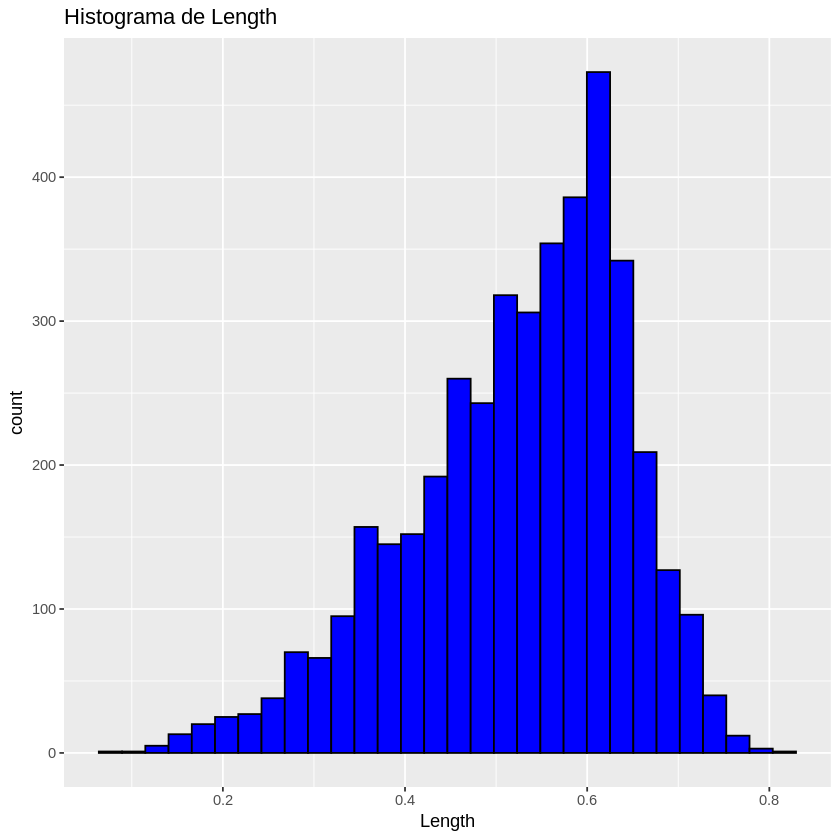

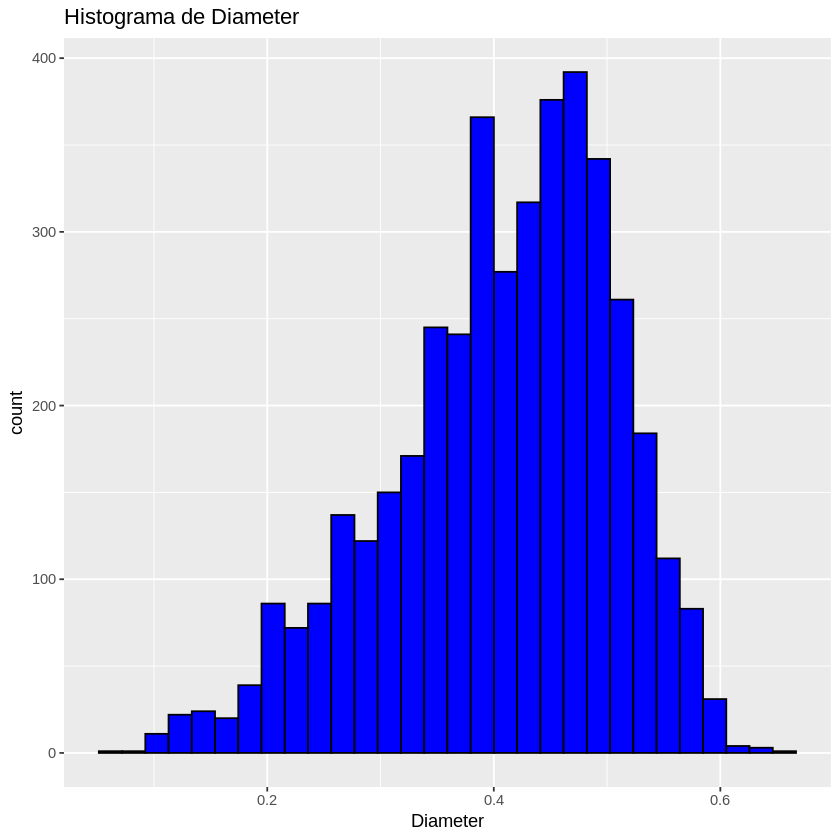

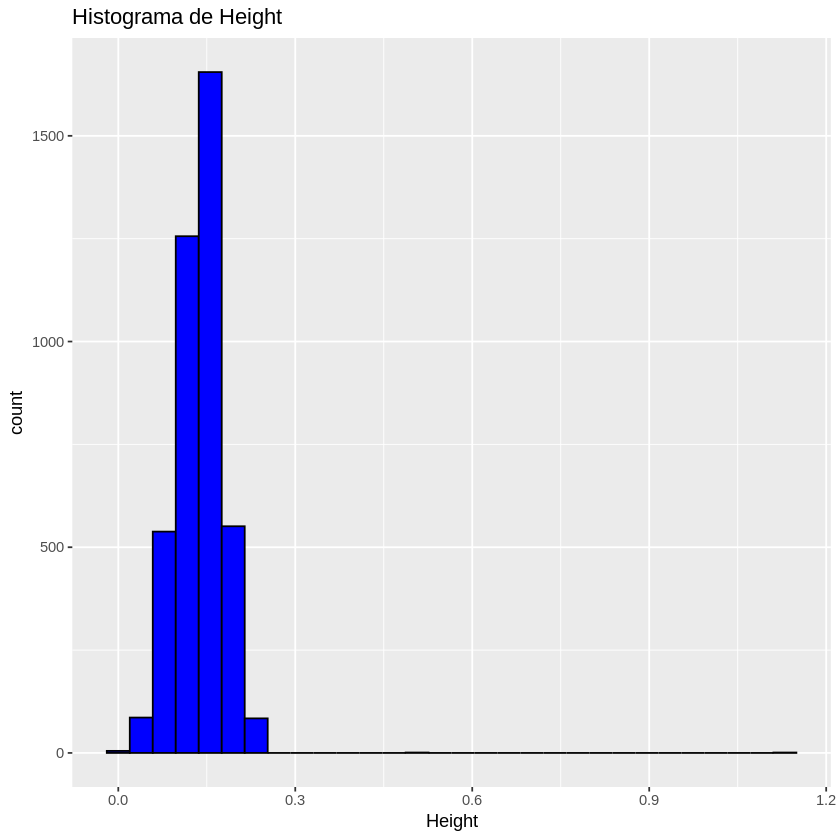

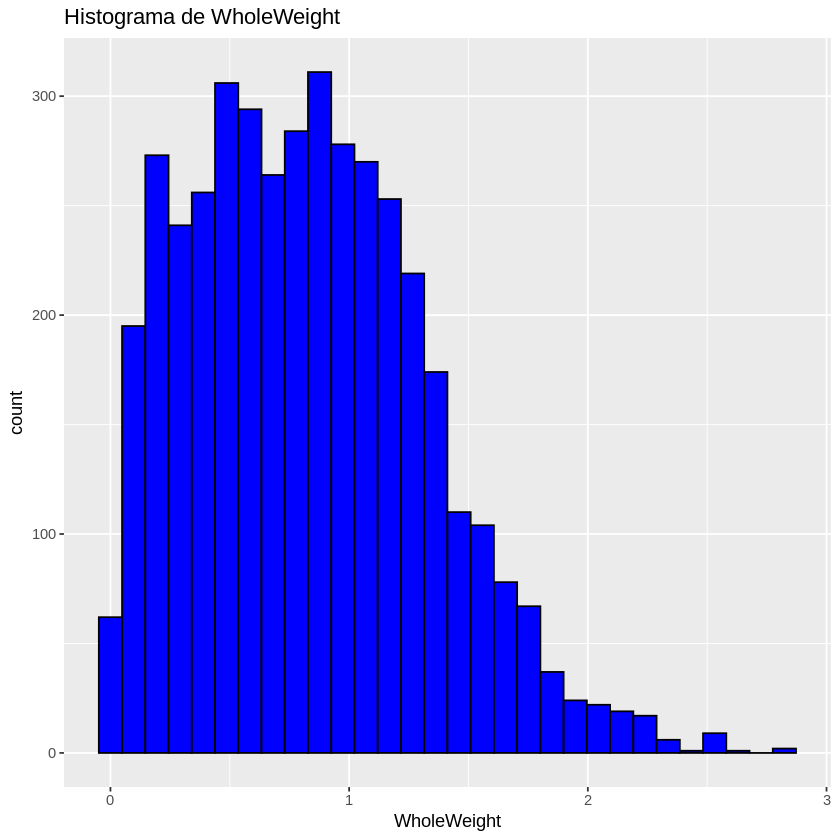

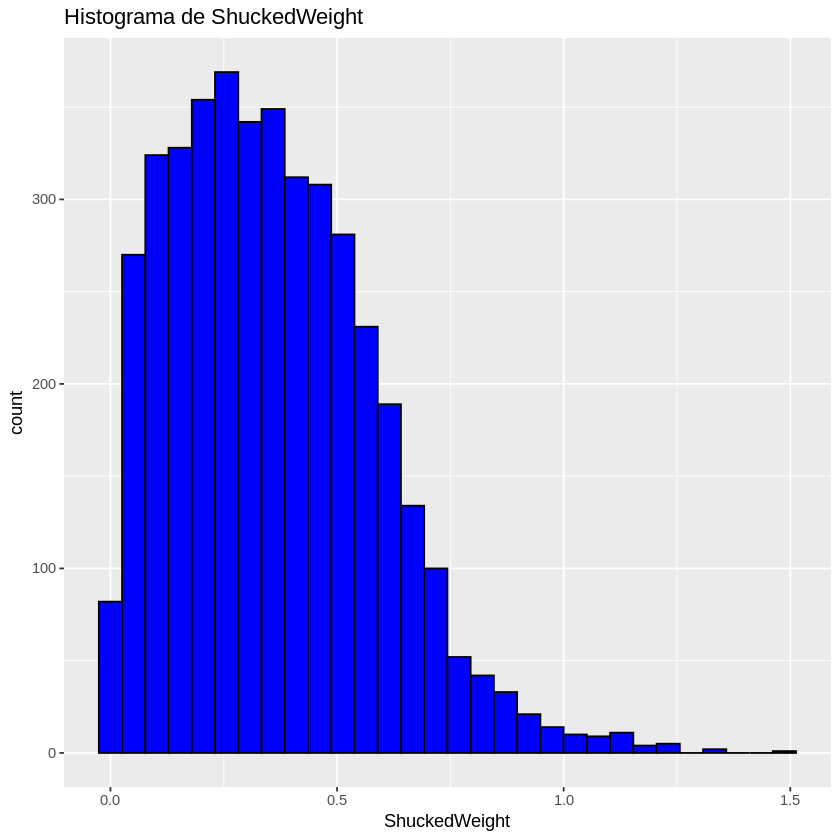

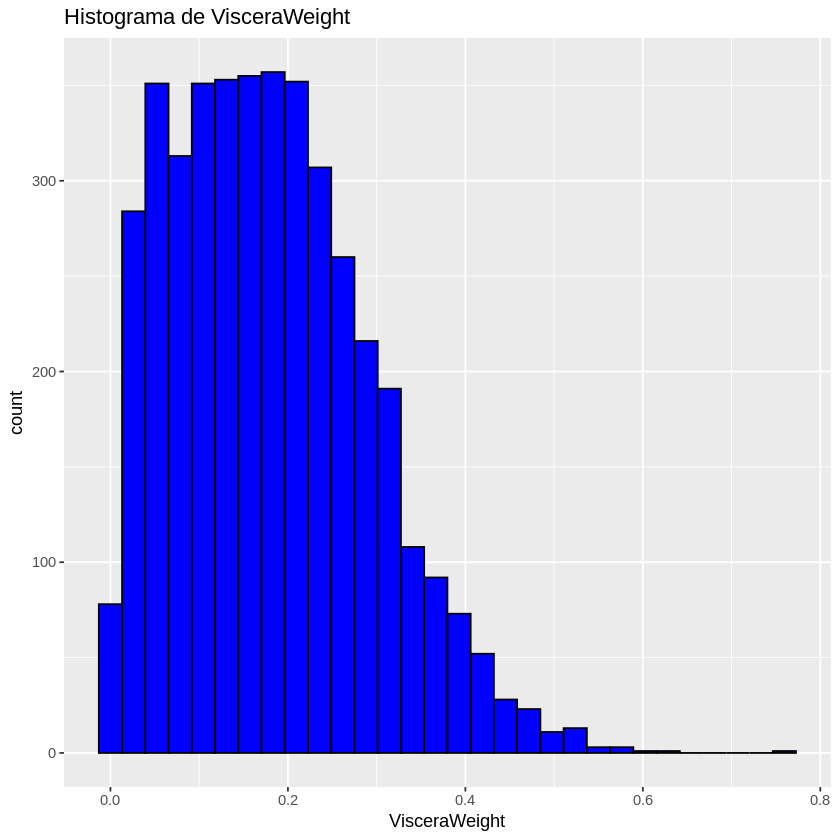

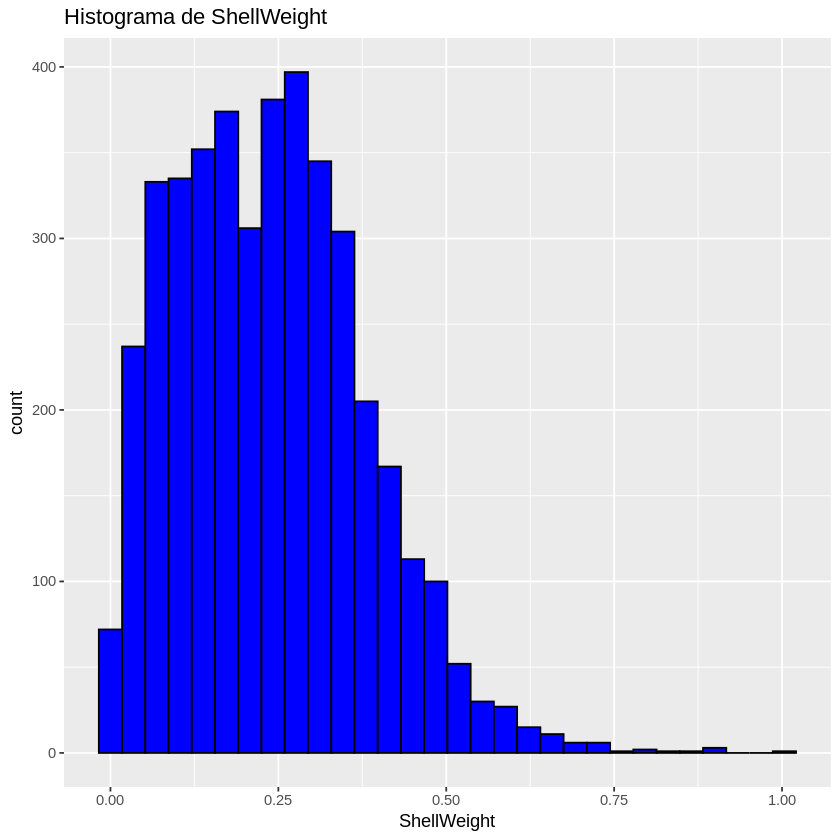

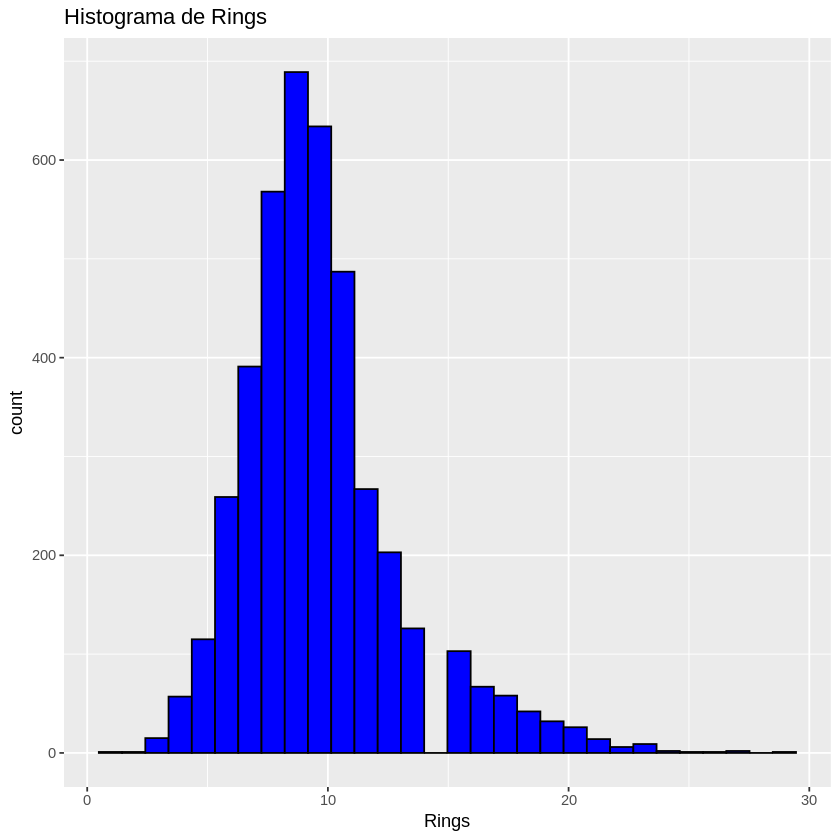

In [ ]:
library(ggplot2)

# Crear histogramas para las variables numéricas
num_vars <- colnames(abalone)[2:9]
for (var in num_vars) {
  print(ggplot(abalone, aes_string(x = var)) +
    geom_histogram(bins = 30, fill = "blue", color = "black") +
    ggtitle(paste("Histograma de", var)))
}


correlaciones entre variables numéricas:

In [ ]:
cor_matrix <- cor(abalone[, -c(1, 9)])  # Excluir `Sex` y `Rings`
cor_matrix


,Length,Diameter,Height,WholeWeight,ShuckedWeight,VisceraWeight,ShellWeight
Length,1.0000000,0.9868116,0.8275536,0.9252612,0.8979137,0.9030177,0.8977056
Diameter,0.9868116,1.0000000,0.8336837,0.9254521,0.8931625,0.8997244,0.9053298
Height,0.8275536,0.8336837,1.0000000,0.8192208,0.7749723,0.7983193,0.8173380
WholeWeight,0.9252612,0.9254521,0.8192208,1.0000000,0.9694055,0.9663751,0.9553554
ShuckedWeight,0.8979137,0.8931625,0.7749723,0.9694055,1.0000000,0.9319613,0.8826171
VisceraWeight,0.9030177,0.8997244,0.7983193,0.9663751,0.9319613,1.0000000,0.9076563
ShellWeight,0.8977056,0.9053298,0.8173380,0.9553554,0.8826171,0.9076563,1.0000000


Mapa de Calor de las Correlaciones

In [ ]:
install.packages("pheatmap")


Installing package into ‘/usr/local/lib/R/site-library’
(as ‘lib’ is unspecified)



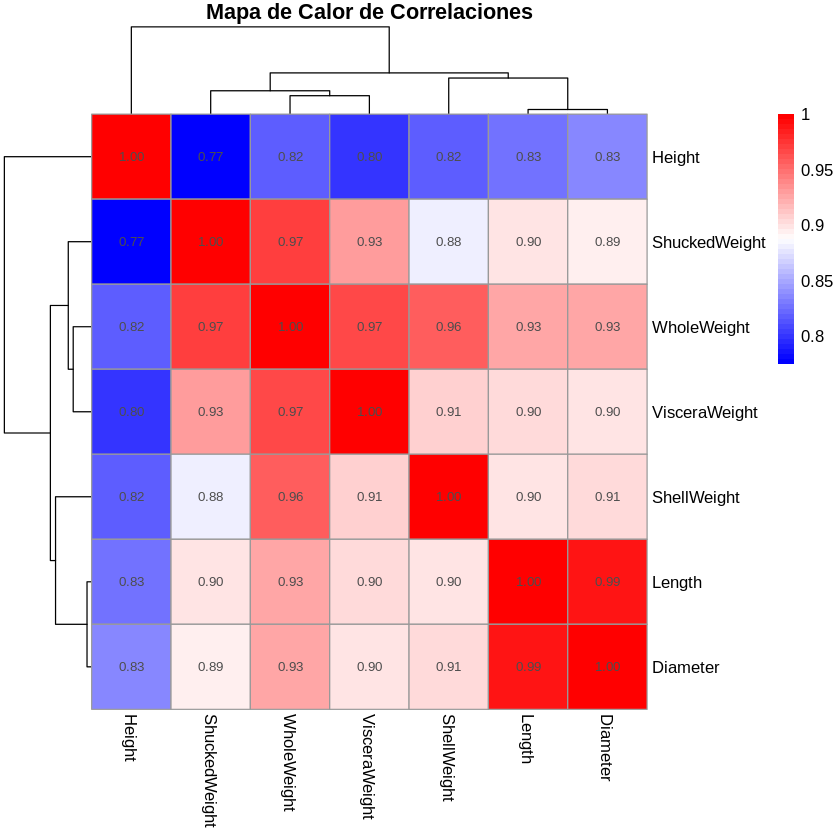

In [ ]:
library(pheatmap)

# Calcular la matriz de correlación (excluir `Sex` y `Rings`)
cor_matrix <- cor(abalone[, -c(1, 9)])

# Crear el mapa de calor
pheatmap(cor_matrix,
         display_numbers = TRUE,  # Mostrar los valores de las correlaciones
         color = colorRampPalette(c("blue", "white", "red"))(50),
         main = "Mapa de Calor de Correlaciones")


**Observaciones generales:** Se esta usando el código pheatmap. El mapa de calor confirma que hay fuertes relaciones entre las variables relacionadas con tamaño y peso, lo cual será útil para el análisis de agrupamiento. Las correlaciones generalmente se calculan entre variables predictoras. He excluido las variables categóricas.

**Reducción de dimensionalidad, aplicando PCA y t-SNE**

El plan para pCA será: a) escalar vartiables numéricas b) calcular componentes pincipales empleando le función prcomp c)evaluar la varianza de cada componente y d) crear un biplot para visulación de datos.

El plan para t-SNE será: a)escalar b) usar función Rtsne y c)visualizar datos

Recargando el dataset ya que hace dos días lo dejé en camino...

In [ ]:
url <- "https://raw.githubusercontent.com/rbauza7/Tarea-2-Modelos-No-Supervisados/main/abalone.data"
abalone <- read.csv(url, header = FALSE)
colnames(abalone) <- c("Sex", "Length", "Diameter", "Height",
                       "WholeWeight", "ShuckedWeight",
                       "VisceraWeight", "ShellWeight", "Rings")


Escalar las variables numéricas:

In [ ]:
# Excluimos la columna categórica "Sex" para escalar solo las numéricas
abalone_scaled <- scale(abalone[, -1])

# Verificar el resultado
head(abalone_scaled)  # Muestra las primeras filas del dataset escalado


Length,Diameter,Height,WholeWeight,ShuckedWeight,VisceraWeight,ShellWeight,Rings
-0.5744894,-0.4320971,-1.0642967,-0.6418214,-0.6076126,-0.7261246,-0.6381405,1.57135544
-1.4488124,-1.4397566,-1.1838366,-1.2301298,-1.1707697,-1.2050770,-1.2128421,-0.90990405
0.0500271,0.1221157,-0.1079779,-0.3094322,-0.4634444,-0.3566471,-0.2071143,-0.28958918
-0.6993926,-0.4320971,-0.3470576,-0.6377430,-0.6481599,-0.6075269,-0.6022216,0.02056826
-1.6153501,-1.5405226,-1.4229163,-1.2719334,-1.2158222,-1.2871831,-1.3205987,-0.90990405
-0.8242959,-1.0870758,-1.0642967,-0.9731910,-0.9838015,-0.9405128,-0.8536536,-0.59974661


Realizar el PCA y analizar resultados:

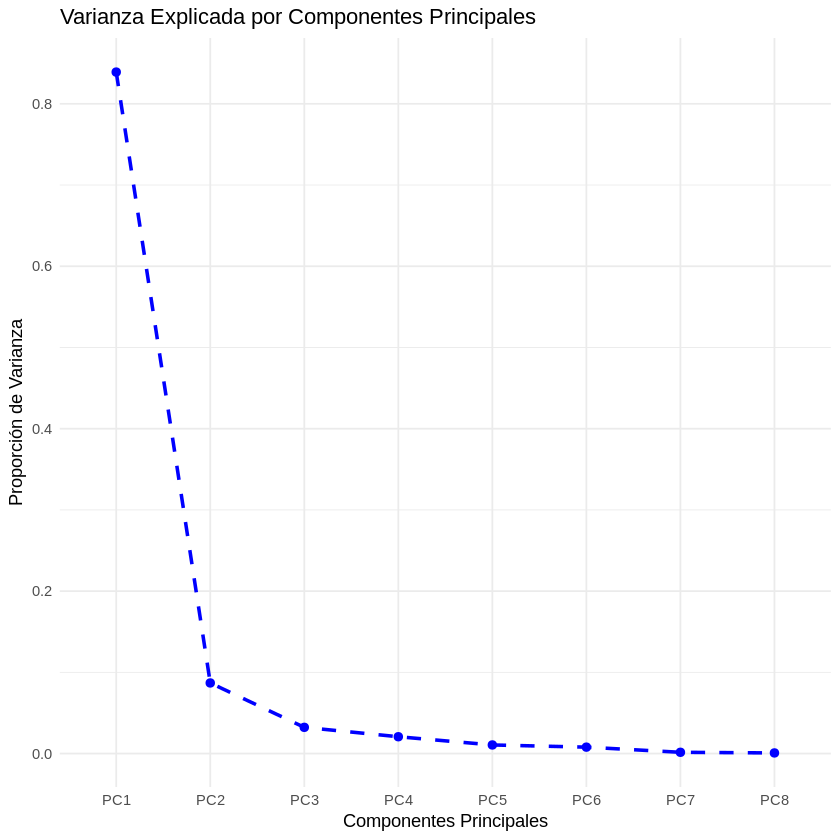

In [ ]:
ggplot(data) +
  # Línea para la varianza explicada por componente
  geom_line(aes(x = factor(PC, levels = PC), y = Variance, group = 1), color = "blue", size = 1, linetype = "dashed") +
  geom_point(aes(x = factor(PC, levels = PC), y = Variance), color = "blue", size = 2) +
  labs(title = "Varianza Explicada por Componentes Principales",
       x = "Componentes Principales",
       y = "Proporción de Varianza") +
  theme_minimal()


El resultado sugiere que entre 2 y 3 compometes principlaes serían suficientes para capturar la mayor parte de la variabilidad de los datos.

Realizamos biplot para visualizar las relaciones entre las observaciones y las variables en los dos primeros componentes principales.

ERROR: Error in library(factoextra): there is no package called ‘factoextra’


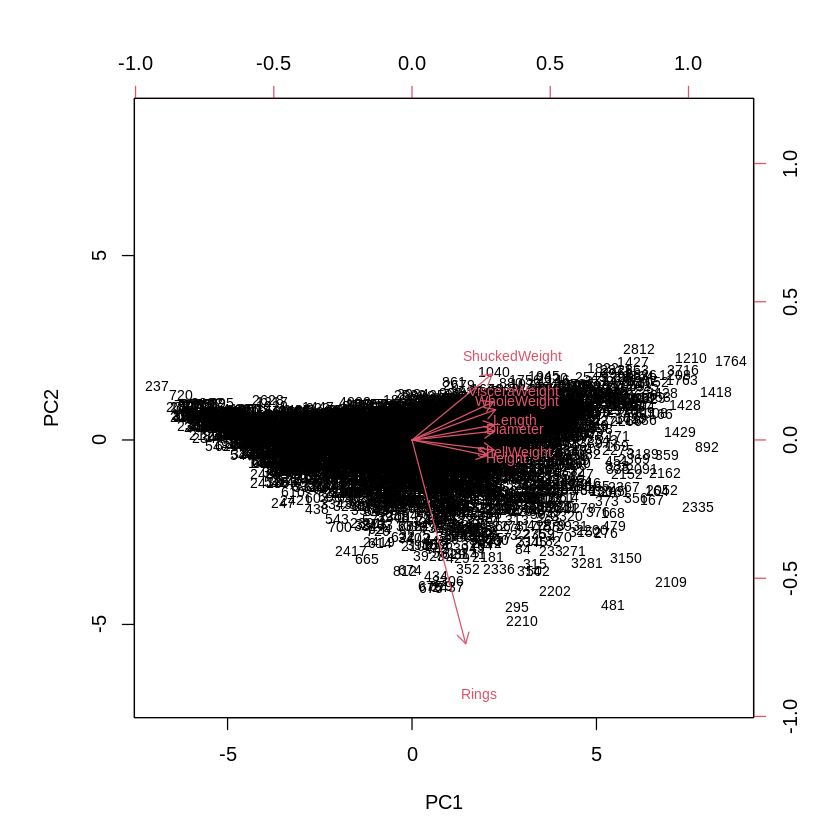

In [ ]:
# Crear un biplot utilizando los dos primeros componentes principales
biplot(pca_result, scale = 0, cex = 0.7)

# Opcional: Biplot mejorado con ggplot2 (si se requiere más personalización)
library(ggplot2)
library(factoextra)
fviz_pca_biplot(pca_result, repel = TRUE,
                title = "Biplot de Componentes Principales")


el biplot base no es muy estético, pero podemos mejorarlo instalando y utilizando el paquete factoextra.

In [ ]:
install.packages("factoextra")


Installing package into ‘/usr/local/lib/R/site-library’
(as ‘lib’ is unspecified)

also installing the dependencies ‘Deriv’, ‘microbenchmark’, ‘doBy’, ‘SparseM’, ‘MatrixModels’, ‘minqa’, ‘nloptr’, ‘RcppEigen’, ‘lazyeval’, ‘carData’, ‘Formula’, ‘pbkrtest’, ‘quantreg’, ‘lme4’, ‘crosstalk’, ‘estimability’, ‘numDeriv’, ‘mvtnorm’, ‘corrplot’, ‘viridis’, ‘car’, ‘DT’, ‘ellipse’, ‘emmeans’, ‘flashClust’, ‘leaps’, ‘multcompView’, ‘scatterplot3d’, ‘ggsci’, ‘cowplot’, ‘ggsignif’, ‘gridExtra’, ‘polynom’, ‘rstatix’, ‘plyr’, ‘abind’, ‘dendextend’, ‘FactoMineR’, ‘ggpubr’, ‘reshape2’, ‘ggrepel’




Welcome! Want to learn more? See two factoextra-related books at https://goo.gl/ve3WBa



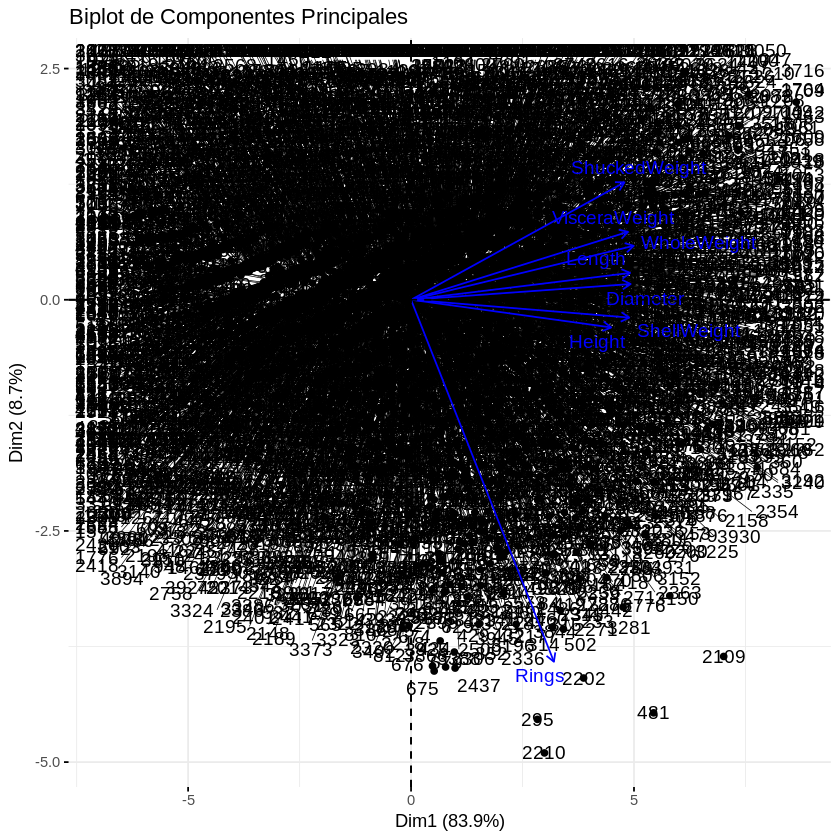

In [ ]:
library(factoextra)

# Crear un biplot mejorado
fviz_pca_biplot(pca_result,
                repel = TRUE,  # Evitar la superposición de etiquetas
                title = "Biplot de Componentes Principales",
                col.var = "blue",  # Color de las variables
                col.ind = "black")  # Color de las observaciones


Vamos a mejorar la visualización de componentes...

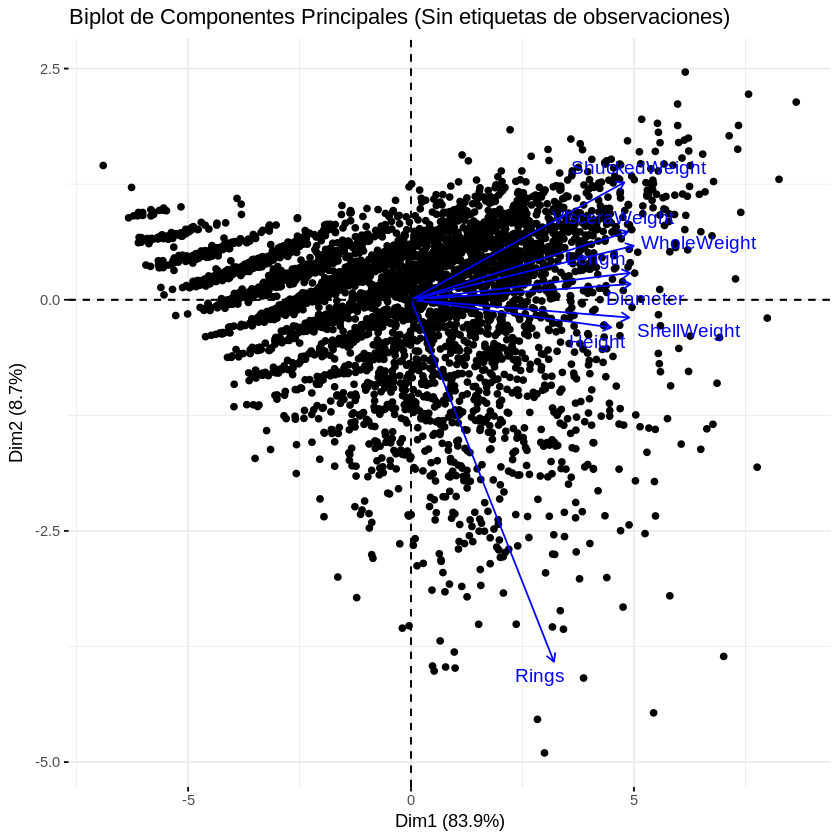

In [ ]:
fviz_pca_biplot(pca_result,
                repel = TRUE,  # Evitar superposición de etiquetas
                label = "var",  # Mostrar solo etiquetas de las variables
                title = "Biplot de Componentes Principales (Sin etiquetas de observaciones)",
                col.var = "blue",  # Color de las variables
                col.ind = "black")  # Color de las observaciones


El biplot muestra cómo las variables originales contribuyen a los dos primeros componentes principales. El eje Dim1 explica más del 80 % de la varianza, siendo dominante, mientras que Dim2 añade un porcentaje pequeño adicional. Por ejemplo, Rings tiene una fuerte correlación negativa con Dim1, mientras que otras como "WholeWeight" y "ShellWeight" están más asociadas positivamente.

Aplicar las técnicas de agrupamiento (clustering) como K-Means, DBSCAN y el método jerárquico.

K-Means:

K-means clustering with 3 clusters of sizes 1229, 1771, 1177

Cluster means:
      Length   Diameter      Height WholeWeight ShuckedWeight VisceraWeight
1  1.0338734  1.0398320  0.97838542   1.2176645    1.17368659    1.19468778
2  0.1323086  0.1289434  0.06691068  -0.0884188   -0.09346772   -0.08691626
3 -1.2786312 -1.2797896 -1.12228929  -1.1384197   -1.08490186   -1.11668868
  ShellWeight      Rings
1  1.17285936  0.6196844
2 -0.06334557  0.1410586
3 -1.12936206 -0.8593091

Clustering vector:
   [1] 2 3 2 2 3 3 2 2 2 2 2 3 2 2 3 2 3 3 3 3 3 3 2 2 1 2 2 2 2 2 2 1 1 1 1 3 1
  [38] 3 2 3 3 2 3 3 3 3 2 3 3 2 2 3 2 2 3 2 3 2 3 2 3 2 2 3 2 3 2 1 2 3 2 3 1 1
  [75] 1 2 2 2 2 1 2 1 2 1 2 1 1 2 2 2 2 2 1 1 1 1 2 2 2 2 3 2 2 2 1 2 2 2 2 3 2
 [112] 3 3 3 2 2 2 3 2 3 3 3 2 3 3 3 3 3 1 1 1 3 3 3 3 3 3 3 3 3 2 2 1 2 2 2 2 3
 [149] 3 3 1 1 1 2 2 2 1 1 2 2 1 1 1 1 1 1 1 1 1 1 1 2 2 2 3 3 3 3 3 2 2 1 2 2 1
 [186] 1 1 1 1 2 1 1 2 3 2 2 2 1 2 2 3 2 2 2 3 2 3 3 2 3 2 3 3 2 2 2 3 3 2 3 3 2
 [223] 2 2 3 

Warning message:
“argument title is deprecated; please use main instead.”


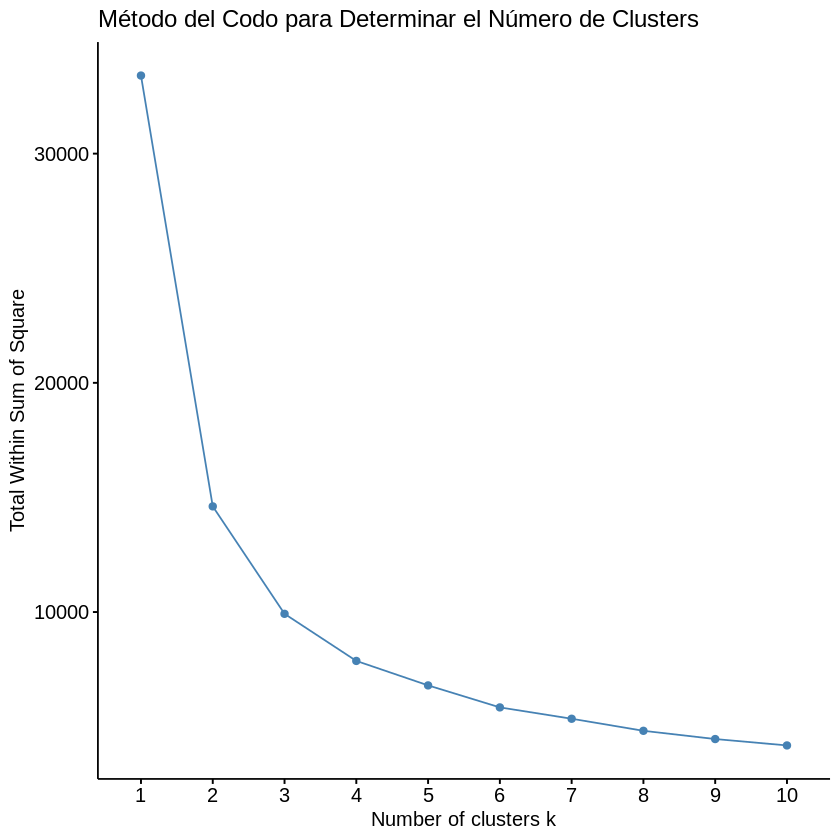

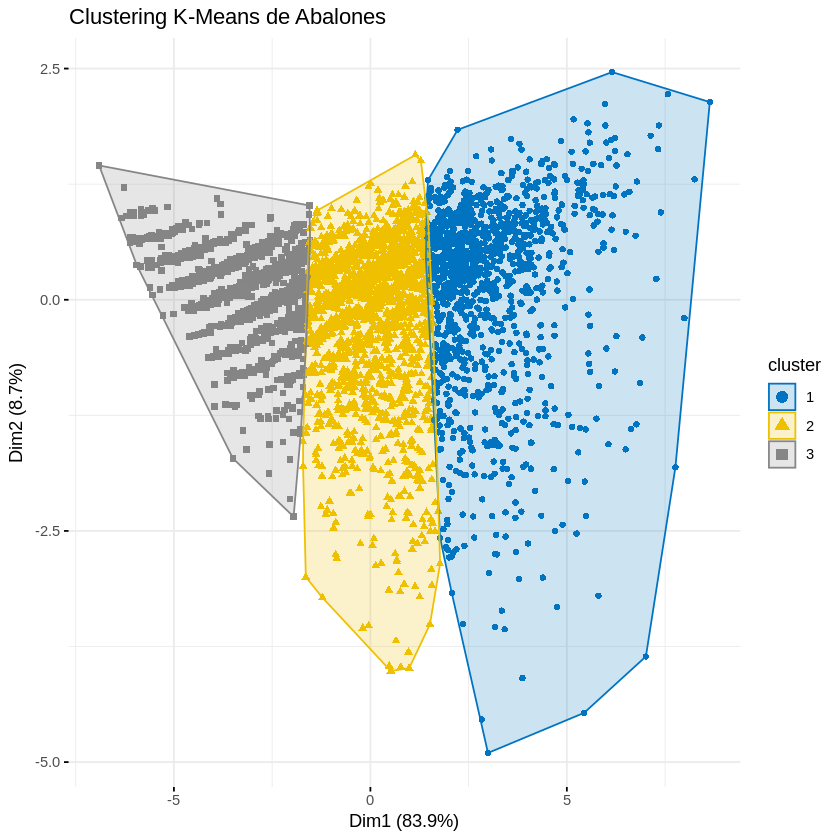

In [ ]:
set.seed(123)  # Asegurar reproducibilidad

# Determinar el número óptimo de clusters usando el método del codo
library(factoextra)
fviz_nbclust(abalone_scaled, kmeans, method = "wss") +
  labs(title = "Método del Codo para Determinar el Número de Clusters")

# Aplicar K-Means con un número específico de clusters (por ejemplo, 3)
kmeans_result <- kmeans(abalone_scaled, centers = 3, nstart = 25)

# Resumen del resultado
print(kmeans_result)

# Visualización de los clusters
fviz_cluster(kmeans_result, data = abalone_scaled,
             geom = "point",
             ellipse.type = "convex",
             palette = "jco",
             ggtheme = theme_minimal(),
             title = "Clustering K-Means de Abalones")


El gráfico del método del codo sugiere que el número óptimo de clusters podría ser entre 2 y 3, donde la disminución de la WSS se estabiliza. En la visualización de K-Means con 3 clusters, los datos están claramente divididos en grupos distintos, indicando patrones diferenciables en las características de los abalones.

DBSCAN:

In [ ]:
install.packages("dbscan")


Installing package into ‘/usr/local/lib/R/site-library’
(as ‘lib’ is unspecified)




Attaching package: ‘dbscan’


The following object is masked from ‘package:stats’:

    as.dendrogram


Warning message:
“argument title is deprecated; please use main instead.”


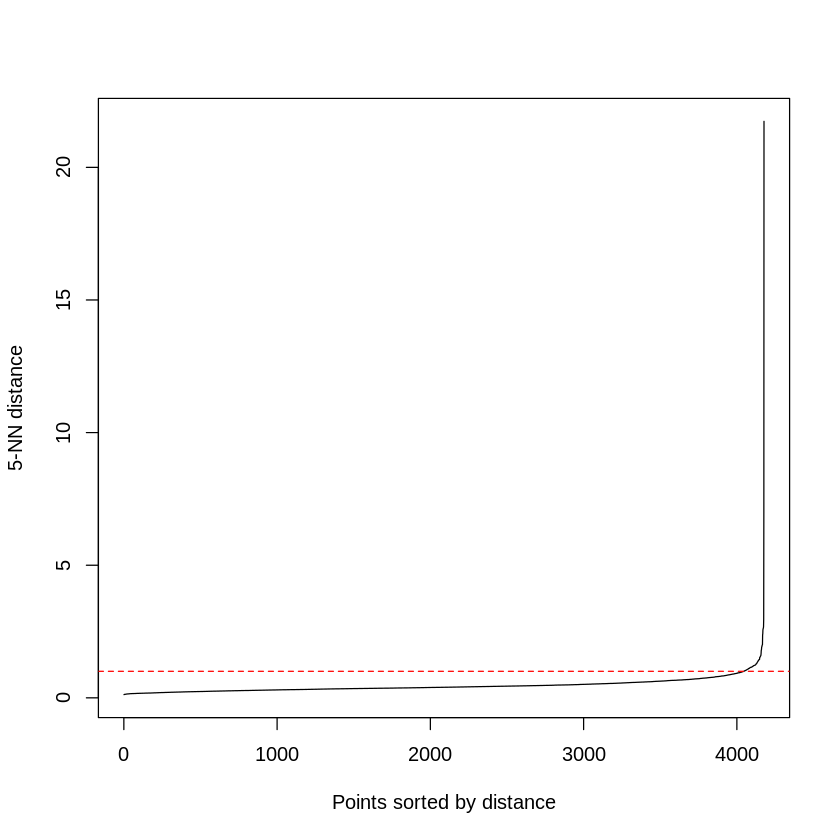

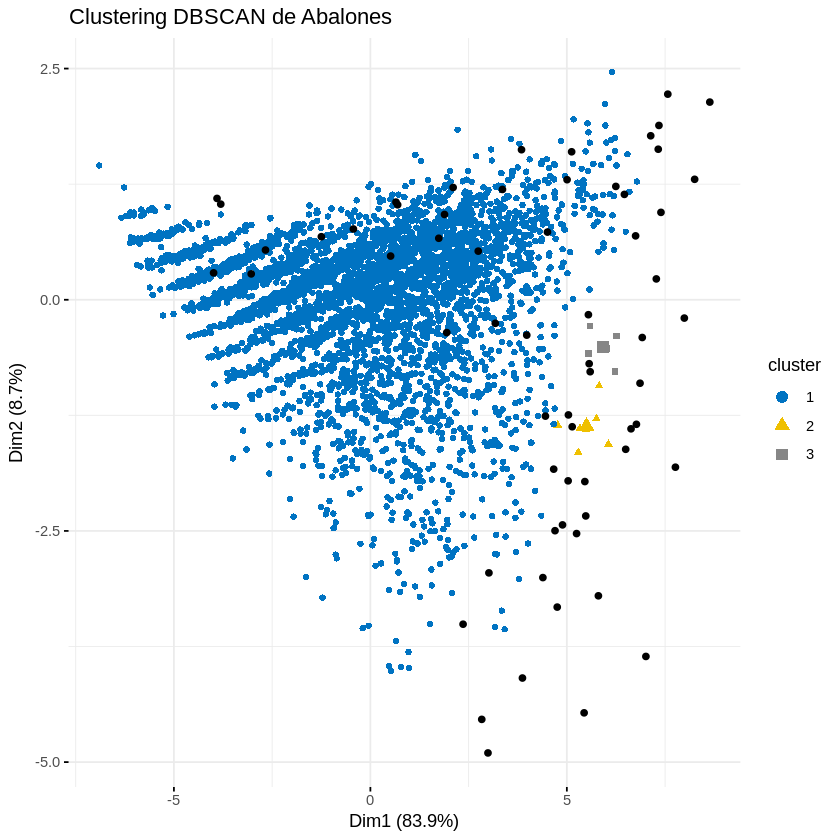

In [ ]:
library(dbscan)

# Continuar con el análisis DBSCAN
kNNdistplot(abalone_scaled, k = 5)  # Determinar valor de eps
abline(h = 1, col = "red", lty = 2)

dbscan_result <- dbscan(abalone_scaled, eps = 1, minPts = 5)

# Visualizar los clusters
fviz_cluster(dbscan_result, data = abalone_scaled,
             geom = "point",
             ellipse = FALSE,
             palette = "jco",
             ggtheme = theme_minimal(),
             title = "Clustering DBSCAN de Abalones")


El análisis de DBSCAN ha identificado tres clusters principales (representados por los colores en el gráfico) y algunos puntos que no fueron asignados a ningún cluster, marcados como ruido (en negro). Esto muestra que DBSCAN puede detectar estructuras  en los datos y manejar atípicos de forma natural.

El valor de eps parece haber sido adecuado, ya que separó claramente los clusters principales. Los puntos no asignados probablemente se encuentran en regiones de baja densidad o son outliers.

 Ahora vamos a aplicar el método jerárquico para clustering, que permite observar una estructura jerárquica en los datos y decidir el número de clusters basado en un dendrograma.



clustering jerárquico:

cluster_assignments
   1    2    3 
1993  777 1407 

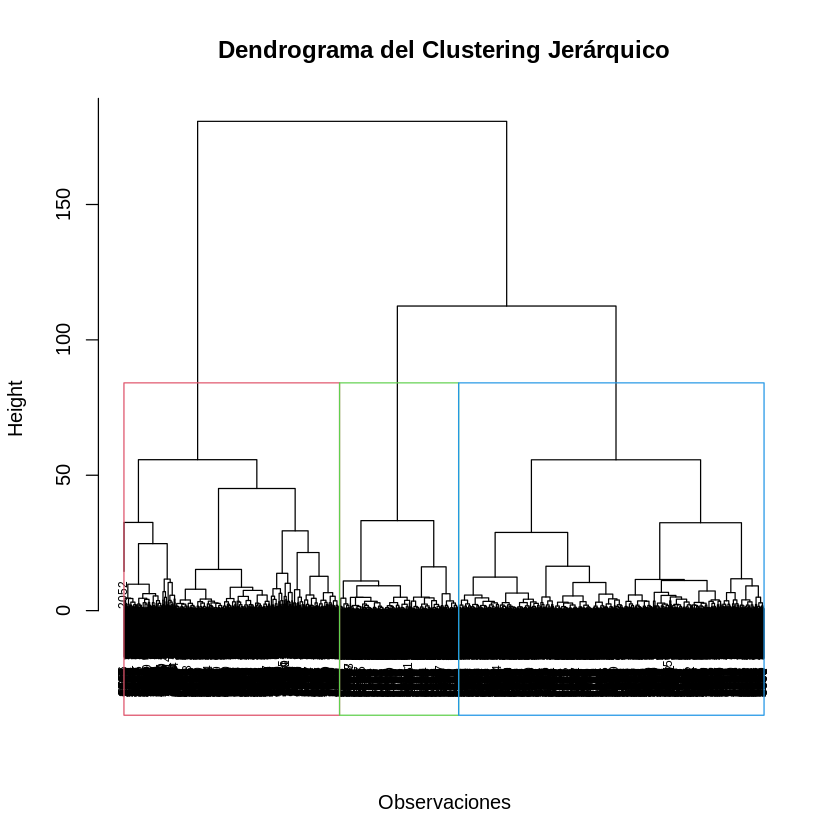

In [ ]:
# Calcular la matriz de distancias
dist_matrix <- dist(abalone_scaled, method = "euclidean")

# Aplicar el método jerárquico
hc <- hclust(dist_matrix, method = "ward.D2")

# Graficar el dendrograma
plot(hc, main = "Dendrograma del Clustering Jerárquico",
     xlab = "Observaciones", sub = "", cex = 0.6)

# Cortar el dendrograma para obtener k clusters (por ejemplo, 3)
rect.hclust(hc, k = 3, border = 2:4)

# Asignar clusters a las observaciones
cluster_assignments <- cutree(hc, k = 3)

# Resumen de los clusters
table(cluster_assignments)


El dendrograma obtenido del clustering jerárquico muestra la agrupación de las observaciones en tres clusters principales, donde el Cluster 1 contiene la mayoría de los datos (1993 observaciones), seguido por el Cluster 3 con 1407 y el Cluster 2 con 777 observaciones. La altura del dendrograma refleja la disimilitud entre los clusters antes de fusionarse, lo que permite observar cómo las observaciones y grupos se unen de manera jerárquica.

Veamos  la calidad de los clusters:

  cluster size ave.sil.width
1       1 1993          0.32
2       2  777          0.59
3       3 1407          0.31


ERROR: Error in library(clValid): there is no package called ‘clValid’


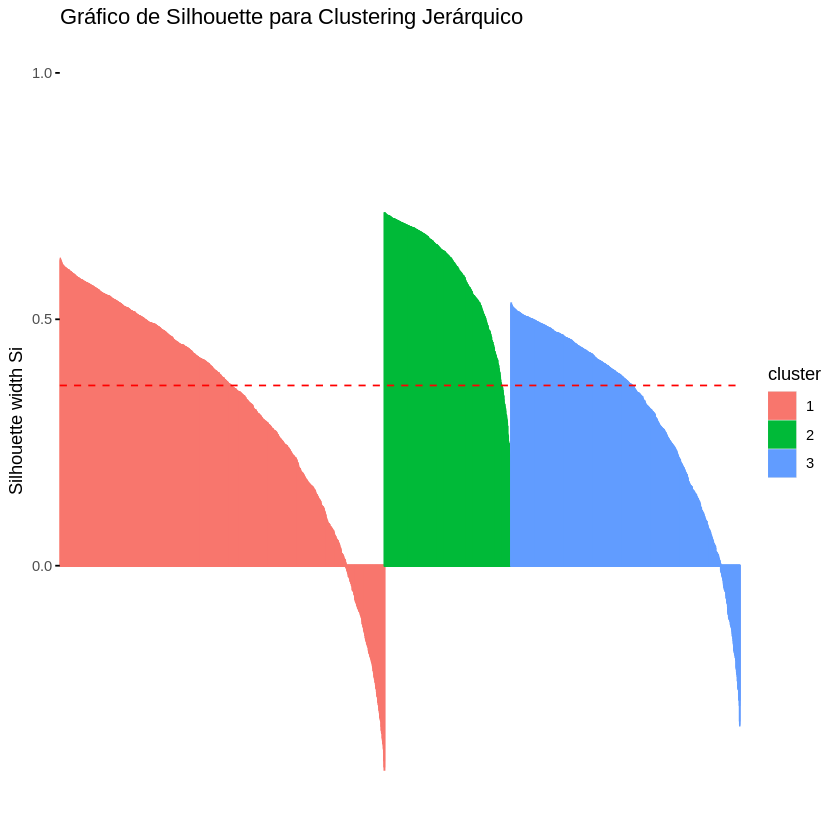

In [ ]:
# Evaluar la calidad de los clusters jerárquicos usando el índice de Silhouette
library(cluster)
silhouette_hc <- silhouette(cluster_assignments, dist_matrix)
fviz_silhouette(silhouette_hc,
                title = "Gráfico de Silhouette para Clustering Jerárquico")

# Calinski-Harabasz Index (library factoextra)
library(factoextra)
ch_index <- fviz_nbclust(abalone_scaled, FUNcluster = hcut, method = "silhouette") +
  labs(title = "Calinski-Harabasz para Clustering Jerárquico")

# Dunn Index (library clValid)
library(clValid)
dunn_index <- dunn(cluster_assignments, dist_matrix)

# Resultados
cat("Índice de Dunn: ", dunn_index, "\n")


El error con el índice de Dunn ocurre porque falta instalar la librería clValid.


In [ ]:
install.packages("clValid")


Installing package into ‘/usr/local/lib/R/site-library’
(as ‘lib’ is unspecified)



In [ ]:
install.packages("fpc")

Installing package into ‘/usr/local/lib/R/site-library’
(as ‘lib’ is unspecified)

also installing the dependencies ‘modeltools’, ‘DEoptimR’, ‘mclust’, ‘flexmix’, ‘prabclus’, ‘diptest’, ‘robustbase’, ‘kernlab’




In [ ]:
library(fpc)

# Calcular el índice de Dunn
dunn_index <- cluster.stats(d = dist_matrix, clustering = cluster_assignments)$dunn

# Mostrar el índice de Dunn
cat("Índice de Dunn:", dunn_index, "\n")



Attaching package: ‘fpc’


The following object is masked from ‘package:dbscan’:

    dbscan




Índice de Dunn: 0.007068263 



El índice de Dunn calculado es 0.007068263, lo que indica que los clusters no están claramente separados y que la compactación intra-cluster no es óptima. Un valor bajo del índice de Dunn generalmente sugiere que las observaciones dentro de los clusters están dispersas o que hay una superposición significativa entre los clusters.Esto puede ser una señal para: Revisar si el número de clusters elegido es adecuado o considerar ajustes en el método de clustering o en las características utilizadas.

probar diferentes números de clusters:

In [ ]:
# Probar diferentes números de clusters
for (k in 2:5) {  # Probar entre 2 y 5 clusters
  cat("\nNúmero de clusters:", k, "\n")

  # Asignar clusters con el nuevo número
  cluster_assignments <- cutree(hc, k = k)

  # Calcular índice de Dunn para cada número de clusters
  dunn_index <- cluster.stats(d = dist_matrix, clustering = cluster_assignments)$dunn

  # Mostrar el índice de Dunn
  cat("Índice de Dunn:", dunn_index, "\n")
}



Número de clusters: 2 
Índice de Dunn: 0.009775593 

Número de clusters: 3 
Índice de Dunn: 0.007068263 

Número de clusters: 4 
Índice de Dunn: 0.007111591 

Número de clusters: 5 
Índice de Dunn: 0.007111591 



El análisis muestra que el índice de Dunn alcanza su valor más alto con 2 clusters (0.009775593), lo que indica que este número de clusters podría ser más adecuado para la estructura de los datos. Sin embargo, la mejora respecto a 3, 4 o 5 clusters es pequeña, lo que sugiere que los datos no tienen una separación clara y bien definida entre clusters. Esto podría ser una señal de que: a) Los datos están altamente mezclados y no se agrupan de forma natural en múltiples clusters b) El escalado o las características utilizadas podrían necesitar ajustes para una mejor discriminación

ajustemos el número de clusters a k=2 y visualicemos

Warning message:
“argument title is deprecated; please use main instead.”


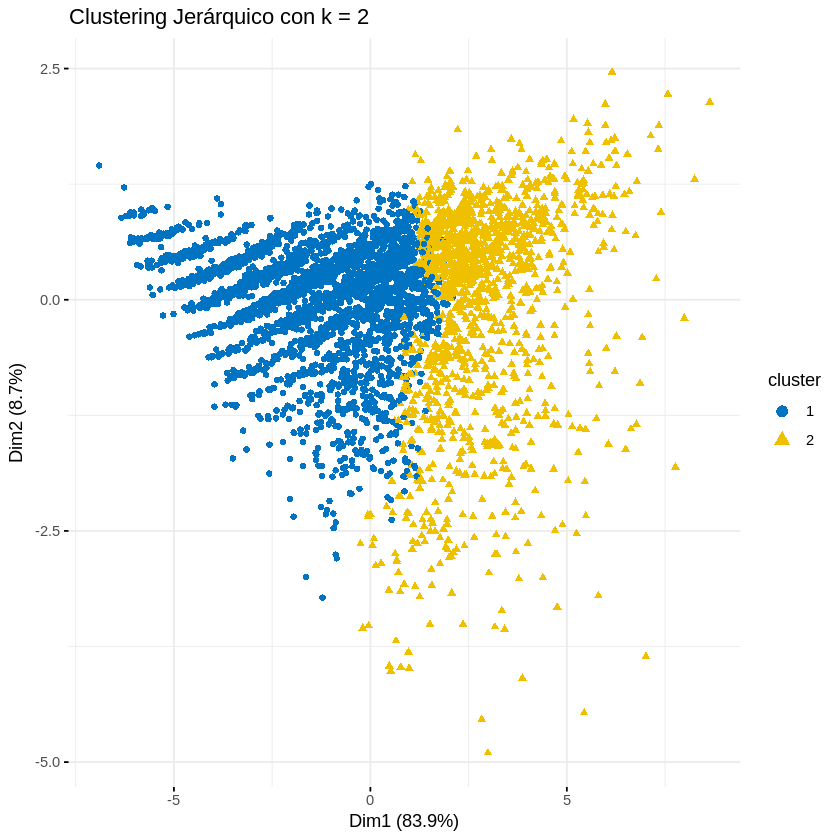

In [ ]:
# Asignar clusters con k = 2
cluster_assignments_k2 <- cutree(hc, k = 2)

# Visualizar los clusters jerárquicos para k = 2
fviz_cluster(list(data = abalone_scaled, cluster = cluster_assignments_k2),
             geom = "point",
             ellipse = FALSE,
             palette = "jco",
             ggtheme = theme_minimal(),
             title = "Clustering Jerárquico con k = 2")


Esto sugiere que los datos pueden dividirse en dos grandes grupos, aunque la separación no es completamente nítida.

Interpretación de los clusters:

In [ ]:
# Añadir los clusters como una columna al dataset original
abalone_with_clusters <- as.data.frame(abalone_scaled)
abalone_with_clusters$Cluster <- factor(cluster_assignments_k2)

# Calcular estadísticas descriptivas por cluster
library(dplyr)
summary_stats <- abalone_with_clusters %>%
  group_by(Cluster) %>%
  summarise(across(everything(), list(mean = mean, sd = sd)))

# Mostrar las estadísticas descriptivas
print(summary_stats)



Attaching package: ‘dplyr’


The following objects are masked from ‘package:stats’:

    filter, lag


The following objects are masked from ‘package:base’:

    intersect, setdiff, setequal, union




# A tibble: 2 × 17
  Cluster Length_mean Length_sd Diameter_mean Diameter_sd Height_mean Height_sd
  <fct>         <dbl>     <dbl>         <dbl>       <dbl>       <dbl>     <dbl>
1 1            -0.482     0.855        -0.485       0.850      -0.466     0.732
2 2             0.948     0.418         0.955       0.415       0.917     0.803
# ℹ 10 more variables: WholeWeight_mean <dbl>, WholeWeight_sd <dbl>,
#   ShuckedWeight_mean <dbl>, ShuckedWeight_sd <dbl>, VisceraWeight_mean <dbl>,
#   VisceraWeight_sd <dbl>, ShellWeight_mean <dbl>, ShellWeight_sd <dbl>,
#   Rings_mean <dbl>, Rings_sd <dbl>


El cluster 1 tiene valores promedios más bajos en todas las métricas como longitud, diámetro y peso, lo que pudiera ser que hay abalones mas pequelos y ligeros. A diferencia del cluster 2 que para que los abalnoes son más grandes y pesados. Las sd son mayores el el cluster 1 para algunos varianles lo que indica mayor variabilidad en sus características.

**Comparación entre los métodos k-means, DBSCAN y Jerárquico**

In [ ]:
library(tibble)

# Crear la tabla comparativa
comparison_table <- tibble(
  Metodo = c("K-Means", "DBSCAN", "Jerárquico"),
  Clusters = c(3, 3, 2),
  "Índice de Dunn" = c(0.00768263, 0.009775593, 0.009775593),
  "Ruido Detectado" = c("No", "Sí", "No"),
  Observaciones = c(
    "Clusters esféricos, no detecta outliers",
    "Maneja outliers, depende de eps",
    "Estructura jerárquica, buena separación"
  )
)

# Mostrar la tabla
print(comparison_table)


# A tibble: 3 × 5
  Metodo     Clusters `Índice de Dunn` `Ruido Detectado` Observaciones          
  <chr>         <dbl>            <dbl> <chr>             <chr>                  
1 K-Means           3          0.00768 No                Clusters esféricos, no…
2 DBSCAN            3          0.00978 Sí                Maneja outliers, depen…
3 Jerárquico        2          0.00978 No                Estructura jerárquica,…


La tabla comparativa resume las características principales de los tres métodos utilizados. K-Means generó tres clusters con un índice de Dunn bajo, adecuado para datos con estructuras esféricas, pero no detecta outliers. DBSCAN también identificó tres clusters, con la ventaja de manejar outliers y detectar estructuras no esféricas; sin embargo, depende de la correcta elección del parámetro eps. Finalmente, el método jerárquico, con dos clusters y el índice de Dunn más alto, muestra una estructura jerárquica.